# 5. Графические возможности библиотеки Matplotlib

Настало время сделать визуальный анализ качественне - переходим к библиотеке MatplotLib.

### НЕМНОГО О БИБЛИОТЕКЕ

MATPLOTLIB - это библиотека Python, обладающая большим количеством возможностей для визуализации и настройки отображения графиков и диаграмм.

Для установки библиотеки введите в командную строку следующее:

In [2]:
pip install matplotlib

You should consider upgrading via the 'c:\Users\sabvip\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


- На самом деле мы с вами уже использовали Matplotlib - встроенная визуализация в PANDAS полностью основана на данной библиотеке. Однако визуализация в Matplotlib не ограничивается только DataFrame: с помощью Matplotlib можно визуализировать любые последовательности (списки, словари, NumPy-массивы).
- К тому же инструментарий библиотеки поможет вам расширить ваши возможности визуализации, управляя параметрами настройки графиков вручную.


За визуализацию графиков в Matplotlib отвечает модуль pyplot. Традиционно он импортируется под псевдонимом plt. Для более корректного отображения графиков в ноутбуках используетя команда %matplotlib inline.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

ПРИМЕЧАНИЕ! Если вы используете темную тему в VS Code, то для корректного отображения графиков на темном фоне выполните следующую команду по установке стиля отображения:

plt.style.use('default')

### ОСНОВНЫЕ ОБЪЕКТЫ MATPLOTLIB

Библиотека Matplotlib позволяет работать в нескольких режимах. Самый распространенный и мощный по функционалу - объектно-ориентировынный режим. Он основан на работе с объектами фигур (figure, их еще называют канвасами или холстами) и координатны плоскостей (axis, или системы координат).

На рисунке ниже представлена визуализация основных компонентов графика в Matplotlib, сохранен в папке.

Процесс работы над графиков максимально прозрачен: сначала создается объект фигуры (fig), содержащий необходимую информацию и настройки, например размер в дюймах (fisize, восемь дюймов в ширину, четыре - в высоту). К этому объекту с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать ее расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает все отведенное место в области (100%, ширина и высота равны 1).

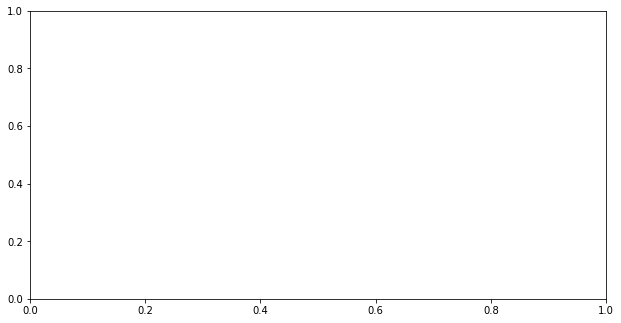

In [4]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

Теперь на созданной системе координат иы можем построить график.

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронаврусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покадет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

У объекта координатной плоскости axes вызовем метод scatter().

ОСНОВНЫЕ ПАРАМЕТРЫ МЕТОДА SCATTER():
- х,у - последовательности, которые будут отложены по осям абсцисс и ординат;
- s - разер макеров;
- market - вид маркетов('o'-точки, '^'-треугольники);
- c - цвет маркеров.

На ДИАГРАММЕ РАССЕЯНИЯ по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат - ежедневный прирост заболевших:

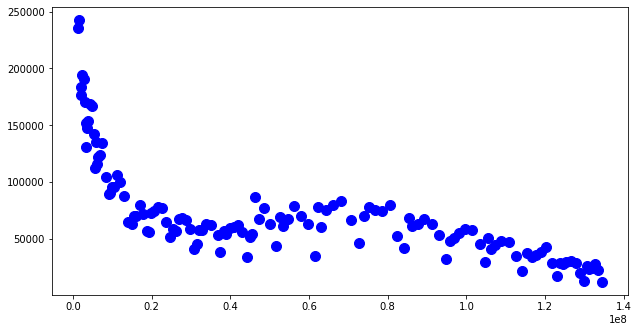

In [5]:
import pandas as pd
covid_df = pd.read_csv('data/covid_df.csv')

us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=100,
    marker='o',
    c = 'blue'
);

Из диаграммы видно, чтоЮ в основном, с ростом числа привитых вторым компонентом людей заболеваемость падает, замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше.






Построим КРУГОВУЮ ДИАГРАММУ, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

    ПРИМЕЧАНИЕ. Обратите внимание, что под "распространенностью" вакцины здесь подразумаевается не количество введенных до (таких данных у нас в таблицк нет), а количество стран, в которых она исользуется. При этом одсчет ведется не по каждой отдельной вакцине, а по их комбинациям, и одна и та же вакцина учитывается несколько раз в сочетаниях с другими. 

Для построения круговых диаграмм в Matplotlib испольщуется метод pie().

ОСНОВНЫЕ ПАРАМЕТРЫ МЕТОДА PIE():
- x - значения, по которым будет строиться круговая диаграмма;
- labels - метки, соответствующие значениям;
- autopct - формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака посе запятой и при выводе будет указа знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний - вывод знака"%");
- explode - последовательность, которая определяет долю смещения сектора от центра для каждого значения из х.

ТОП-10 комбинаций вакцин (vaccines) по распространенности мы нахожим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения - индекчы промежуточной таблицы. Будем отображать доли в проентах и округлять их до одного знака после запятой. Самую распространенную вакцину смести на 10  от центра:

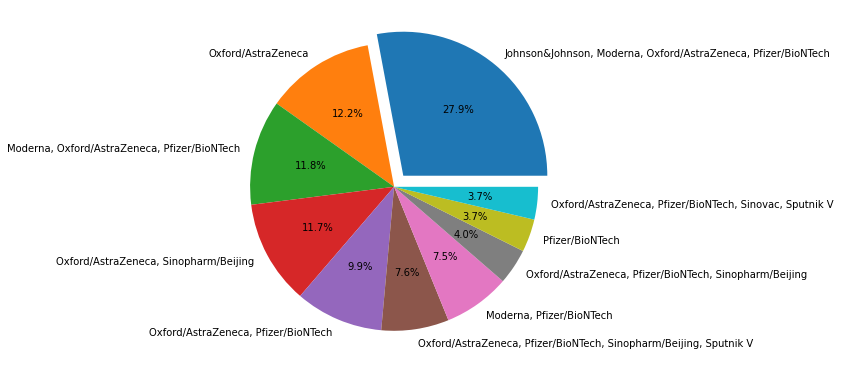

In [6]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

Самой распространенной комбинацией вакцин является комбинация:  Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. Причем можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.

### ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ

Вы, наверное, заметили, что до этого иы не подписывали графики. График не имеет смысла, если без лишних слова непонятно, что на нем изображено. Управлять информативностью графика можно с помощью методов координатной плоскости AXES. Перечислим основны из них (не пугайтесь, запоминать из не обязательно - вы всегда сможете подсмотреть из в документации):



- axes.set_title() - заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
- axes.set_xlabel() - название оси абсцисс;
- axes.set_ylabel() - название оси ординат;
- axes.set_xticks() - установка отметок на оси абсцисс;
- axes.set_yticks() - установка отметок на оси ординат;
- axes.xaxis.set_tick_params() - управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
- axes.yaxis.set_tick_params() - управление параметрами отметок на оси ординат;
- axes.legend() - отображение легенды;
axes.grid() - установка сетки. 

Например, изобразим на одном графике, как росла обща заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas). При вызове метода без параметров по оси абсцисс откладываются значения столбца таблицы, по оси ординат - индексы(в нашем случае это будут даты).

Дополнительно в параметрах метода указываем параметр label - название графика, которое будет отобрадаться на легенде, а также lw - щирину линии графика. Добавим к графику заголок, название осей, установим метки по оси у с частотой в 10 000, попернем метки по оси х на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метод plot()):

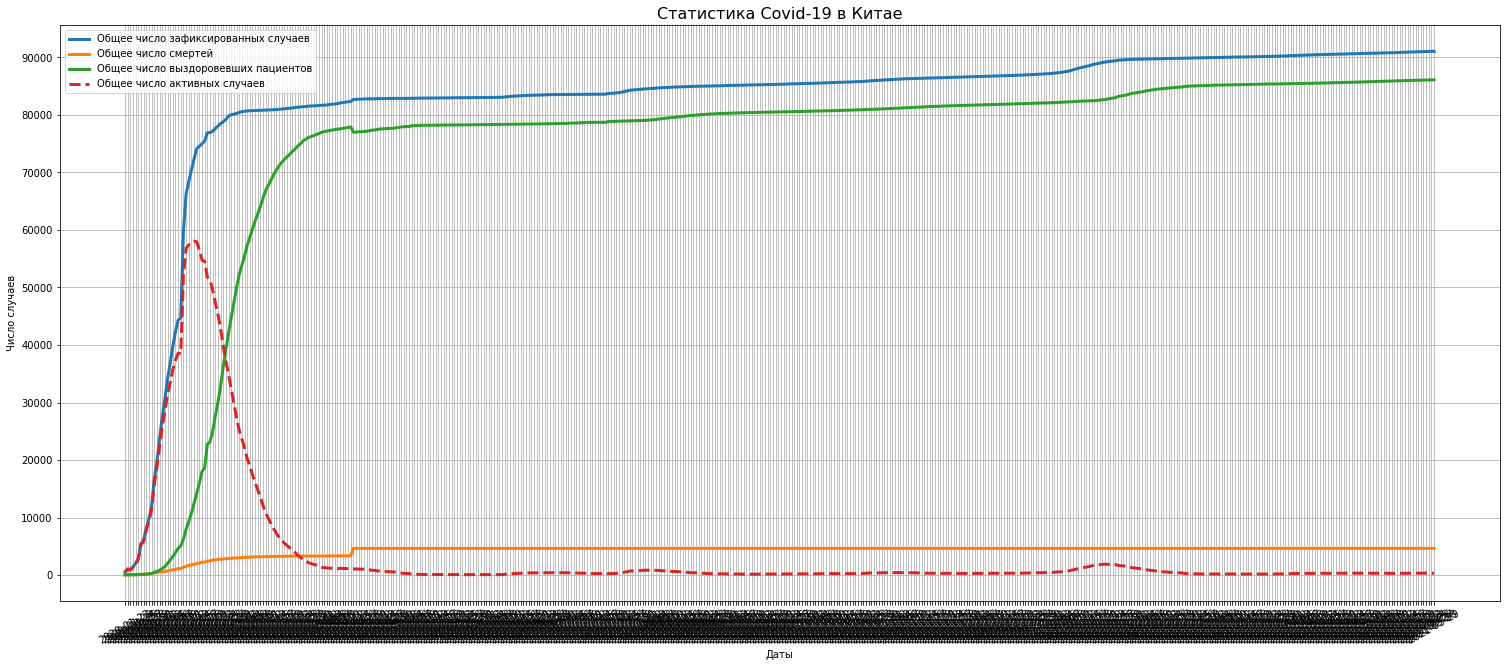

In [7]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(20, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

На графике наблюдаетс резкий рост аболеваемости на начальном периоде до середины февраля 2020 года, после чего видно резкое падение числа активных случаев (примерно в этот период власти Китая ввели тотальный локдаун и прекратили транспортное сообщение со всем миром). Далее чило активных случаев только падает, а темп прироста числа заболевших снижается. При этом общее число смертей в Китае остается практически на одном уровне (около 5 тысяч), уже начиная с мая 2020 года (новые пациенты умирают крайне редко).

Стоит обратить внимание на выделенные черныи маркером сдвиги в графиках. Они являются свидетельством противоречия в данных: общее число выздоровевших пациентов почему-то резко упало, а число умерших возросло. Почемут так произошло? Произошел пересчет числа заболевших? Данные были утеряны или искажены? Есои вы в своей практике столкнетесь с такими же противоречиями, вам необходимо будет обратиться к первоисточнику, чтобы выяснить причину.

### ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ

При испльзовании библиотеки Matplotlib вовсе не обязательно ограничиваться одной систеомй координат.

    Вы сможете размещать несколько систем координат на одной фигуре, что позволит нам отображать вспомогательную информацию на основном графике. 

    Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат. 

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

Для жтого построим столбчатые диаграммы с помощью метода BAR().

ОСНОВНЫЕ ПАРАМЕТРЫ МЕТОДА BAR():
- x - названия категорий, которые будут располгаться по оси абсцисс;
- height - высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т.д.);
- width - ширина столбцов диаграммы;
- color - цвет.


Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() и выбираем ТОП-5 стран с использованием метода nlargest().

При отображении графиков создаем две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчаты диаграммы. 

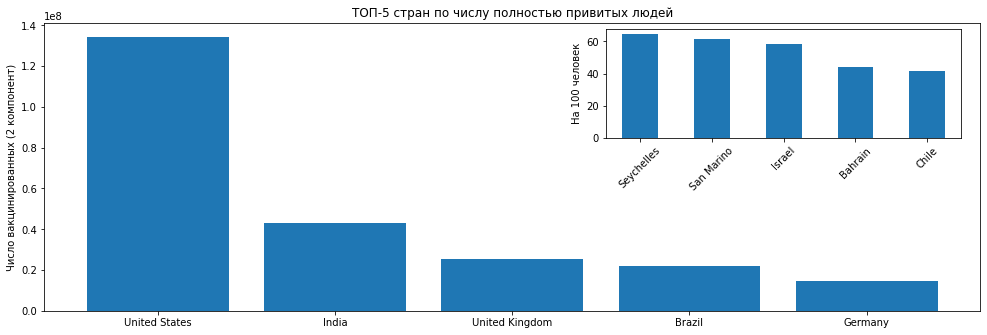

In [8]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

# ВИЗУАЛИЗАЦИЯ ГЛАВНОГО ГРАФИКА
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('ТОП-5 стран по числу полностью привитых людей')

# ВИЗУАЛИЗАЦИЯ ВСПОМОГАТЕЛЬНОГО ГРАФИКА
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

    ПРИМЕЧАНИЕ! Первые два числовых параметра, указанные при создании систем координат, - это отступ снизу и слева, следующие два - ширина и высота относитльено щирины и высоты всего пространства (в долях единицы) для построения графика.

Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения - Сейшелы. В первй список попали страны с большим количеством населения, которое они активно прививабт. Во второй список попали маленкие стран, которые проще всего обеспечить вакциной.

В наш ТОП не попали страны, которые пользуются однокомпонентнй вакциной, например Китай.

### SUBPLOTS

Создание дополнительных систем координат с поомщью метода add_axes() полезно, однако используется не так часто. 

В большинстве случаев для отображения нескольких систем координат используется функция subplots(). Она создает целую таблицу из систем координат на одной фигуре. Функция возвращает на новую фигуру, а таке список координатных плоскостей. 

ОСНОВНЫЕ ПАРАМЕТРЫ МЕТОДА SUBPLOTS():
- nrows - число строк;
- ncols - число столбцов;
- figsize - общий размер фигуры в дюймах (ширина и высота).

Например, следующий код создаст шесть координатных плоскостей, сведенных в таблицу размера 2*3:

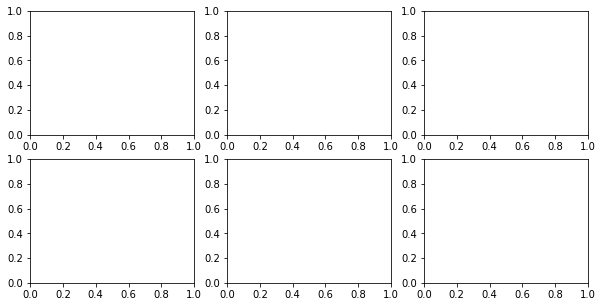

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

Теперь, обладая знаниями о методе SUBPLOTS(), построим три графика:
1) Столбчатую диаграмму, которая покажет динамку ежедневной вакцинации в России.
2) Линейный график изменения ежедневной заболеваемости в стране.
3) Гистограмму ежедневной заболеваемости в стране. 

За построение гистограмм в библиотеке Matplotlib отвечает метод HIST().

ОСНОВНЫЕ ПАРАМЕТРЫ МЕТОДА HIST():
- x - массив чисел, для которого строится гистограмма;
- bins - число столбцов (корзин);
- orientation - ориентация гистограммы (по умолчанию 'vertical');
- color - цвет.

Фильтруем таблицу covid_df по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответсвубщей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2).
ДАльнейшая настрйка графиков вам уже известна.

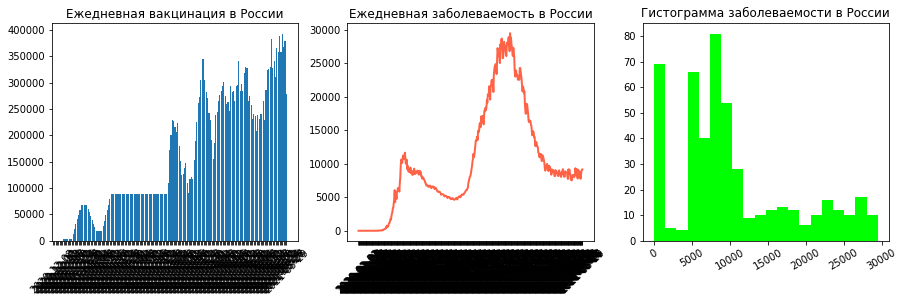

In [14]:

russia_data = covid_df[covid_df['country'] == 'Russia']

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data['date'],
    height=russia_data['daily_vaccinations'],
    label='Число вакциноированных',
)
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data['date'],
    russia_data['daily_confirmed'],
    label='Число заболевших',
    color='tomato',
    lw=2,
)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data['daily_confirmed'], label=['Число заболевших'], color='lime', bins=20
)
axes[2].set_title('Гистограмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=30)


- На первом графике моно наблюдать колеблющийся рост числа ежедневно вакинированных людей. Особенно в глаза бросется "пенек"  в период с концп января до начала марта 2021 года. Это период, когда данные о процессе вакцинации людей не обновлялись.

- На втором графике мы видим две волны коронавируса в России. Первая - в середине марта 2020 год, которая достигла максимума в 12 тысяч заболевших за сутки. Вторая волна, судя по графику, началась в октябре 2020 года и достигла своего пика почти в 30 тысяч заболевших за сутки в концк декабря этого же года (точные данные: 24 декабря было зафиксировано рекордное число подтвержденных случаев: 29935). Далее с ростом показателей вакцинации и введением новых карантинных мер заболеваемость снова постепенно снижается.

- На третьем графике можно увидеть то большая асть наблюений ежедневно заболеваемости находится в интервале от 5 до 10 тысяч человек в день. Еще один пик кистограммы находится около 0 - это случаи, зафиксированные на начальных этапах эпидемии (в Россию Covid-19 пришел позже, чем во многие другие страны).